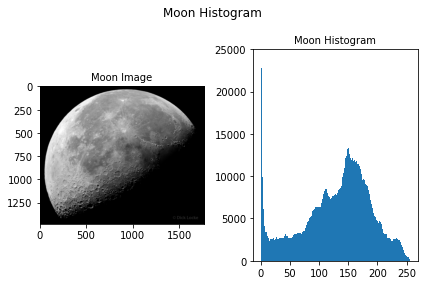

In [6]:
# Moon 影像顯示與直方圖分布

import numpy as np
import cv2
import matplotlib.pyplot as plt

# 讀入圖片
img_m = cv2.imread('moon.jpg',0)
img_m = cv2.resize(img_m, None, fx = 0.5, fy = 0.5)

# 設定子圖表
plt.subplot(1,2,1)
# 設定子圖表的標題
plt.title('Moon Image', fontsize = 10)
# 顯示圖片
plt.imshow(cv2.cvtColor(img_m, cv2.COLOR_GRAY2RGB))

plt.subplot(1,2,2)
plt.title('Moon Histogram', fontsize = 10)
# 顯示原始圖片的直方圖
plt.hist(img_m.ravel(),256,[0,256])
# 設置此子圖表的x座標
plt.xticks([0, 50, 100, 150, 200, 250])
# 設置此子圖表的y軸上限
plt.ylim([0, 25000])

# 設置圖表標題
plt.suptitle('Moon Histogram')
# 調整子圖表間距
plt.tight_layout()
# 儲存圖表
plt.savefig('./Moon Histogram.jpg', dpi = 500)

# 顯示圖表
plt.show()

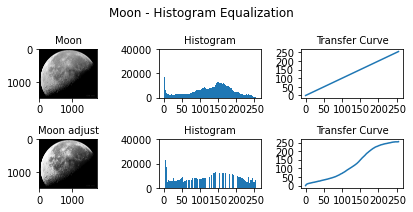

In [1]:
# Histogram Equalization 直方圖均衡化

import numpy as np
import cv2
import matplotlib.pyplot as plt

# 讀入圖片
img_m = cv2.imread('moon.jpg',0)
img_m = cv2.resize(img_m, None, fx = 0.5, fy = 0.5)

# 設定繪製子圖表的個數
p_r, p_c = 3,3

# 定義直方圖均衡化的函數
def histogramEqualization(img):
    
     # 得到讀入圖片的長與寬
    row, col = img.shape

    # 取得此張圖片的原始直方圖
    his_cur, bins = np.histogram(img.flatten(),256,[0,256])
    
    # 得到每個灰階的累積和
    his_normalized = his_cur.cumsum()
    # print(his_adj)
    
    # 做Equalization
    his_normalized = (his_normalized - his_normalized.min()) * 255 / (his_normalized.max() - his_normalized.min())
    
    # 將numpy的資料型態轉換
    his_normalized = his_normalized.astype('uint8')
    
    # 將舊的圖片與轉換過的值重新匹配         
    img_normal = his_normalized[img]

    return img_normal, his_normalized

# 定義顯示函數
def display(title, img_o, img, his_adj, i):
    
    # 說明子圖表為何
    plt.subplot(p_r,p_c,i)
    plt.title(title, fontsize = 10)
    # 顯示原始圖片
    plt.imshow(cv2.cvtColor(img_o, cv2.COLOR_GRAY2RGB))
    
    plt.subplot(p_r,p_c,i+1)
    plt.title('Histogram', fontsize = 10)
    # 顯示原始圖片的直方圖
    plt.hist(img_o.flatten(),256,[0,256])
    plt.ylim([0, 40000])
    # 設置此子圖表的x座標
    plt.xticks([0, 50, 100, 150, 200, 250])
    
    plt.subplot(p_r, p_c,i+2)
    plt.title('Transfer Curve', fontsize = 10)
    x = np.linspace(0,255)
    y = x
    plt.plot(x, y)
    plt.yticks([0, 50, 100, 150, 200, 250])
    plt.xticks([0, 50, 100, 150, 200, 250])

    plt.subplot(p_r,p_c,i+3)
    plt.title(title + ' adjust', fontsize = 10)
    # 顯示原始圖片
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

    plt.subplot(p_r,p_c,i+4)
    plt.title('Histogram', fontsize = 10)
    # 顯示原始圖片的直方圖
    plt.hist(img.ravel(),256,[0,256])
    # 設置此子圖表的x座標
    plt.xticks([0, 50, 100, 150, 200, 250])
    plt.ylim([0, 40000])

    plt.subplot(p_r,p_c,i+5)
    plt.title('Transfer Curve', fontsize = 10)
    # 繪製轉換曲線
    plt.plot(his_adj)
    # 設置此子圖表的y座標
    plt.yticks([0, 50, 100, 150, 200, 250])
    # 設置此子圖表的x座標
    plt.xticks([0, 50, 100, 150, 200, 250])

# 將Moon圖片做histogramEqualization，並顯示出來
img, h = histogramEqualization(img_m)
display('Moon', img_m, img, h, 1)

cv2.imwrite('./Moon_HisEQ.jpg', img)

# 設置圖表標題
plt.suptitle('Moon - Histogram Equalization')
# 調整子圖表間距
plt.tight_layout()
# 將圖表存檔
plt.savefig('./Moon Histogram Equalization.jpg', dpi = 500)
plt.show()

print()

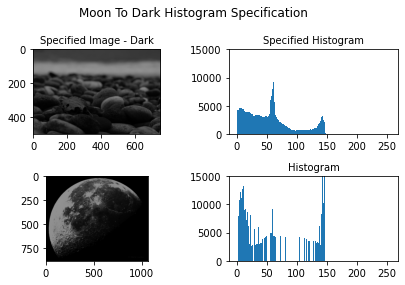

In [32]:
# Histogram Specification 直方圖匹配 - Moon To Dark

import numpy as np
import cv2
import matplotlib.pyplot as plt

# 讀入圖片
img_m = cv2.imread('moon.jpg',0)
img_m = cv2.resize(img_m, None, fx = 0.3, fy = 0.3)
img_d = cv2.imread('dark.jpg',0)
img_d = cv2.resize(img_d, None, fx = 0.5, fy = 0.5)

# 設定繪製子圖表的個數
p_r, p_c = 2,2

# 定義尋找函數
# 相減之後離最小值(也就是離target最近的值)的index
def findIndex(source, target):

    # 將要尋找的array與目標相減
    diff = source - target

    # 回傳最小值的index
    return np.abs(diff).argmin()

# 將原始圖片直方圖均衡化
img, his_normalized_ori = histogramEqualization(img_m)

# 將指定圖片直方圖均衡化
img_spe, his_normalized_spe = histogramEqualization(img_d)

# 宣告匹配的直方圖
matchHis = his_normalized_ori.copy()

# 逐一尋找原圖0-255對應指圖片的值
for i in range(0, 255):
    matchHis[i] = findIndex(his_normalized_spe, his_normalized_ori[i])

result = img.copy()

# 將匹配的直方圖與原圖做匹配
result = matchHis[img]

# 設定子圖表
plt.subplot(p_r,p_c,1)
# 設定子圖表的標題
plt.title('Specified Image - Dark', fontsize = 10)
# 顯示圖片
plt.imshow(cv2.cvtColor(img_d, cv2.COLOR_GRAY2RGB))

plt.subplot(p_r,p_c,2)
plt.title('Specified Histogram', fontsize = 10)
# 顯示原始圖片的直方圖
plt.hist(img_d.ravel(),256,[0,256])
# 設置此子圖表的x座標
plt.xticks([0, 50, 100, 150, 200, 250])
plt.ylim([0, 15000])

plt.subplot(p_r,p_c,3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_GRAY2RGB))

plt.subplot(p_r,p_c,4)
plt.title('Histogram', fontsize = 10)
plt.hist(result.ravel(),256,[0,256])
plt.xticks([0, 50, 100, 150, 200, 250])
plt.ylim([0, 15000])

# 設置圖表標題
plt.suptitle('Moon To Dark Histogram Specification')
# 調整子圖表間距
plt.tight_layout()
# 儲存子圖表
plt.savefig('./Moon Histogram Specification01.jpg', dpi = 500)

# 顯示圖表
plt.show()

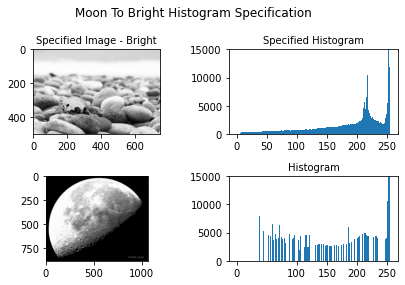

In [3]:
# Histogram Specification 直方圖匹配 - Moon To Bright

# 讀入圖片
img_m = cv2.imread('moon.jpg',0)
img_m = cv2.resize(img_m, None, fx = 0.3, fy = 0.3)
img_d = cv2.imread('bright.jpg',0)
img_d = cv2.resize(img_d, None, fx = 0.5, fy = 0.5)

img, his_normalized_ori = histogramEqualization(img_m)
img_spe, his_normalized_spe = histogramEqualization(img_d)

matchHis = his_normalized_ori.copy()

result = img.copy()
for i in range(0, 255):
    matchHis[i] = findIndex(his_normalized_spe, his_normalized_ori[i])
    
result = matchHis[img]

plt.subplot(p_r,p_c,1)
plt.title('Specified Image - Bright', fontsize = 10)
plt.imshow(cv2.cvtColor(img_d, cv2.COLOR_GRAY2RGB))

plt.subplot(p_r,p_c,2)
plt.title('Specified Histogram', fontsize = 10)
plt.hist(img_d.ravel(),256,[0,256])
plt.xticks([0, 50, 100, 150, 200, 250])
plt.ylim([0, 15000])

plt.subplot(p_r,p_c,3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_GRAY2RGB))

plt.subplot(p_r,p_c,4)
plt.title('Histogram', fontsize = 10)
plt.hist(result.ravel(),256,[0,256])
plt.xticks([0, 100, 150, 200, 250])
plt.ylim([0, 15000])

plt.suptitle('Moon To Bright Histogram Specification')
plt.tight_layout()
plt.savefig('./Moon Histogram Specification02.jpg', dpi = 500)
plt.show()

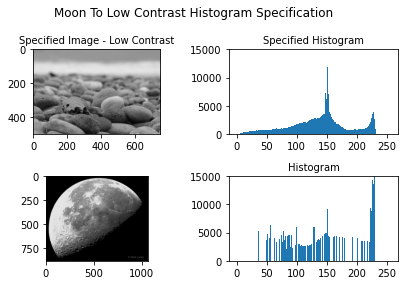

In [4]:
# Histogram Specification 直方圖匹配 - Moon To Low Contrast

# 讀入圖片
img_m = cv2.imread('moon.jpg',0)
img_m = cv2.resize(img_m, None, fx = 0.3, fy = 0.3)
img_d = cv2.imread('low_contrast.jpg',0)
img_d = cv2.resize(img_d, None, fx = 0.5, fy = 0.5)
img, his_normalized_ori = histogramEqualization(img_m)
img_spe, his_normalized_spe = histogramEqualization(img_d)

matchHis = his_normalized_ori.copy()

result = img.copy()
for i in range(0, 255):
    matchHis[i] = findIndex(his_normalized_spe, his_normalized_ori[i])
    
result = matchHis[img]

plt.subplot(p_r,p_c,1)
plt.title('Specified Image - Low Contrast', fontsize = 10)
plt.imshow(cv2.cvtColor(img_d, cv2.COLOR_GRAY2RGB))

plt.subplot(p_r,p_c,2)
plt.title('Specified Histogram', fontsize = 10)
plt.hist(img_d.ravel(),256,[0,256])
plt.xticks([0, 50, 100, 150, 200, 250])
plt.ylim([0, 15000])

plt.subplot(p_r,p_c,3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_GRAY2RGB))

plt.subplot(p_r,p_c,4)
plt.title('Histogram', fontsize = 10)
plt.hist(result.ravel(),256,[0,256])
plt.xticks([0, 50, 100, 150, 200, 250])
plt.ylim([0, 15000])

plt.suptitle('Moon To Low Contrast Histogram Specification')
plt.tight_layout()
plt.savefig('./Moon Histogram Specification03.jpg', dpi = 500)
plt.show()

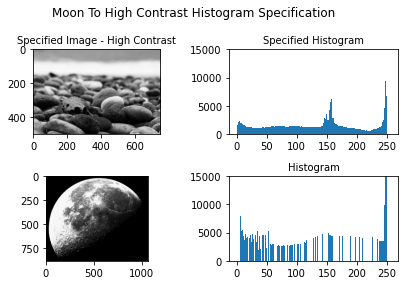

In [5]:
# Histogram Specification 直方圖匹配 - Moon To High Contrast

# 讀入圖片
img_m = cv2.imread('moon.jpg',0)
img_m = cv2.resize(img_m, None, fx = 0.3, fy = 0.3)
img_d = cv2.imread('high_contrast.jpg',0)
img_d = cv2.resize(img_d, None, fx = 0.5, fy = 0.5)
img, his_normalized_ori = histogramEqualization(img_m)
img_spe, his_normalized_spe = histogramEqualization(img_d)

matchHis = his_normalized_ori.copy()

result = img.copy()
for i in range(0, 255):
    matchHis[i] = findIndex(his_normalized_spe, his_normalized_ori[i])
    
result = matchHis[img]

plt.subplot(p_r,p_c,1)
plt.title('Specified Image - High Contrast', fontsize = 10)
plt.imshow(cv2.cvtColor(img_d, cv2.COLOR_GRAY2RGB))

plt.subplot(p_r,p_c,2)
plt.title('Specified Histogram', fontsize = 10)
plt.hist(img_d.ravel(),256,[0,256])
plt.xticks([0, 50, 100, 150, 200, 250])
plt.ylim([0, 15000])

plt.subplot(p_r,p_c,3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_GRAY2RGB))

plt.subplot(p_r,p_c,4)
plt.title('Histogram', fontsize = 10)
plt.hist(result.ravel(),256,[0,256])
plt.xticks([0, 50, 100, 150, 200, 250])
plt.ylim([0, 15000])

plt.suptitle('Moon To High Contrast Histogram Specification')
plt.tight_layout()
plt.savefig('./Moon Histogram Specification04.jpg', dpi = 500)
plt.show()

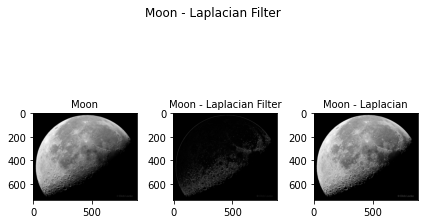

In [9]:
# Moon - Laplacian Filter

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀入圖片
img = cv2.imread('moon.jpg',0)
# 調整圖片大小
img = cv2.resize(img, None, fx = 0.25, fy = 0.25)

# 定義Laplacian函數
def laplacian(img, K_size=3):

    row, col = img.shape

    # 取得要擴增的像素
    pad = K_size // 2

    # 宣告result
    result = np.zeros((row + pad * 2, col + pad * 2), dtype=np.float64)

    # 將圖片存入result中
    result[pad : pad + row, pad : pad + col] = img.copy().astype(np.float64)
    
    tmp = result.copy()

    # Laplacian kernle
    K = [[0.,  1., 0.],
         [1., -4., 1.], 
         [0.,  1., 0.]]

    # 銳化影像
    for i in range(row):
        for j in range(col):
            result[pad + i, pad + j] = (-1) * np.sum(K * ( tmp [i : i + K_size, j : j + K_size]))
    
    # 將結果限制在0~255內
    result = np.clip(result, 0, 255)
    
    # 將擴增的像素材切
    result = result[ pad : pad + row, pad : pad + col].astype(np.uint8)

    # 將Laplacian的結果與原圖相加
    add = cv2.add(tmp[ pad : pad + row, pad : pad + col].astype(np.uint8), result)

    # 回傳Laplacian的結果與相加的結果
    return result, add.astype(np.uint8)

result, en_img = laplacian(img, K_size=3)

# 決定繪製子圖表的個數
p_r,p_c = 1,3

plt.subplot(p_r,p_c,1)
plt.title('Moon', fontsize = 10)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

plt.subplot(p_r,p_c,2)
plt.title('Moon - Laplacian Filter', fontsize = 10)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_GRAY2RGB))

plt.subplot(p_r,p_c,3)
plt.title('Moon - Laplacian', fontsize = 10)
plt.imshow(cv2.cvtColor(en_img, cv2.COLOR_GRAY2RGB))

plt.suptitle('Moon - Laplacian Filter')
plt.tight_layout()
plt.savefig('./Moon Laplacian Filter.jpg', dpi = 500)

cv2.imwrite('Moon Laplacian.jpg',result)
cv2.imwrite('Moon Laplacian enchanced.jpg',en_img)

plt.show()

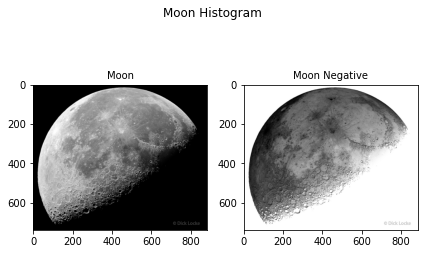

In [12]:
# Moon - Negative

# 生成負相影像
img_m_inv = 255 - en_img

p_r,p_c = 1,2

plt.subplot(p_r,p_c,1)
plt.title('Moon', fontsize = 10)
plt.imshow(cv2.cvtColor(en_img, cv2.COLOR_GRAY2RGB))

plt.subplot(p_r,p_c,2)
plt.title('Moon Negative', fontsize = 10)
plt.imshow(cv2.cvtColor(img_m_inv, cv2.COLOR_GRAY2RGB))

plt.suptitle('Moon Histogram')
plt.tight_layout()
plt.savefig('./Moon Neg.jpg', dpi = 500)
cv2.imwrite('Moon Laplacian enchanced neg.jpg',img_m_inv)

plt.show()